<h1> Name : Puru Chaudhary </h1>
<h1> Student No: 22200581 </h1>
<h1> API Link used https://global-warming.org </h1>

<h1> Task 2 </h1>

### Importing the required libraries

In [343]:
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

<h3> Calling in the saved data from the JSON File </h3>

In [344]:
# Assigning variable name for further manipulation of the JSON files fetched from the API links 
lst = ['temp.json', 'meth_temp.json', 'polar_temp.json', 'nit_temp.json', 'co2_temp.json']
f = open('temp.json')
temp = json.load(f)
f = open('meth_temp.json')
meth_temp = json.load(f)
f = open('polar_temp.json')
polar_temp = json.load(f)
f = open('nit_temp.json')
nit_temp = json.load(f)
f = open('co2_temp.json')
co2_temp = json.load(f)

<h1> DATA PREPARATION </h1>

# Creation of the dataframes out of the JSON files

### Creation of dataframe for the Temprature file 

In [345]:
#Creation of dataframe out of the Temprature file 
list_temp = [] 
for i in range(0, len(temp['result'])):
     list_temp.append(temp['result'][i]['time'].split('.')[0])#Append the year column to a new list and creating a dataframe out of that list
        
#Creating the dataframe out of that list 
temp_df = pd.DataFrame(list_temp, columns = ['Year'])
temp_df

#Preprocessing the dictionary data from the JSON file and storing that data into the DataFrame
temp_df['month']= pd.NA
temp_df['Station'] = pd.NA
temp_df['land'] = pd.NA
for i in range(0, len(temp_df)):
    temp_df['month'].iloc[i] = temp['result'][i]['time'].split('.')[1]
    temp_df['Station'].iloc[i] = temp['result'][i]['station']
    temp_df['land'].iloc[i] = temp['result'][i]['land']

#Converting the Datatype from object to float for the columns  Station and Land
temp_df['Station'] = temp_df['Station'].astype(float)
temp_df['land'] = temp_df['land'].astype(float)

#Converting the month column to the right format 
temp_df['month'].replace({'04': 1, '13':2, '21': 3, '29': 4, '38' : 5 , '46' : 6, '54' :7, '63' : 8, '71':9, '79' : 10, '88' :11, '96' :12}, inplace = True)

temp_df.head()

,Year,month,Station,land
0,1880,1,-0.28,-0.18
1,1880,2,-0.47,-0.24
2,1880,3,-0.33,-0.08
3,1880,4,-0.53,-0.15
4,1880,5,-0.25,-0.09


### Creation of dataframe for the Methane File 

In [346]:
#Creating a list in order for it to be converted to dataframe 
meth = []
for i in range(1, len(meth_temp['methane'])):
    meth.append(meth_temp['methane'][i]['date'].split('.')[0])  

#Converting the list into the dataframe
meth_df1 = pd.DataFrame(meth, columns = ['Year'])

#Creating new columns in the dataframe 
meth_df1['month']= pd.NA
meth_df1['average'] = pd.NA
meth_df1['trend'] = pd.NA
meth_df1['averageUnc'] = pd.NA
meth_df1['trendUnc'] = pd.NA

#Reading the json file and pushing data into the dataframe columns
for i in range(1, len(meth_temp['methane'])):
    meth_df1['month'].iloc[i-1] = meth_temp['methane'][i]['date'].split('.')[1]
    meth_df1['average'].iloc[i-1] = meth_temp['methane'][i]['average']
    meth_df1['trend'].iloc[i-1] = meth_temp['methane'][i]['trend']
    meth_df1['averageUnc'].iloc[i-1] = meth_temp['methane'][i]['averageUnc']
    meth_df1['trendUnc'].iloc[i-1] = meth_temp['methane'][i]['trendUnc']
 
# Converting the dataframe columns to their right datatype 

meth_df1['average'] = meth_df1['average'].astype(float)
meth_df1['trend'] = meth_df1['trend'].astype(float)
meth_df1['averageUnc'] = meth_df1['averageUnc'].astype(float)
meth_df1['trendUnc'] = meth_df1['trendUnc'].astype(float)
meth_df1.head()

,Year,month,average,trend,averageUnc,trendUnc
0,1983,7,1626.58,1635.31,2.10,1.39
1,1983,8,1627.88,1635.92,2.69,1.33
2,1983,9,1638.49,1636.53,2.33,1.27
3,1983,10,1644.80,1637.16,1.59,1.20
4,1983,11,1642.58,1637.83,0.78,1.12


### Creation of dataframe for the co2 file

In [347]:
#Creating a list in order for it to be converted to dataframe 
co2_list = []
for i in range(0, len(co2_temp['co2'])):
    co2_list.append(co2_temp['co2'][i]['year'])

#Converting the list to the dataframe
co2_df1 = pd.DataFrame(co2_list, columns = ['Year'])

#Adding new columns to the dataframe
co2_df1['Day'] = pd.NA
co2_df1['Month'] = pd.NA
co2_df1['Day'] = pd.NA
co2_df1['Cycle'] = pd.NA
co2_df1['Trend'] = pd.NA

#Reading the json file and pushing data into the dataframe columns
for i in range(0, len(co2_df1)):
    co2_df1['Day'].iloc[i] = co2_temp['co2'][i]['day']
    co2_df1['Month'].iloc[i] = co2_temp['co2'][i]['month']
    co2_df1['Cycle'].iloc[i] = co2_temp['co2'][i]['cycle']
    co2_df1['Trend'].iloc[i] = co2_temp['co2'][i]['trend']
    
#Converting the date to the right format 
co2_df1["Date"] = pd.to_datetime(co2_df1["Year"] + "/" + co2_df1["Month"] + "/" + co2_df1["Day"])

#Converting the columns to the right format 
co2_df1['Cycle'] = co2_df1['Cycle'].astype(float)
co2_df1['Trend'] = co2_df1['Trend'].astype(float)

co2_df1.head()

,Year,Day,Month,Cycle,Trend,Date
0,2012,20,1,393.35,391.58,2012-01-20
1,2012,21,1,393.36,391.59,2012-01-21
2,2012,22,1,393.37,391.59,2012-01-22
3,2012,23,1,393.38,391.60,2012-01-23
4,2012,24,1,393.39,391.60,2012-01-24


### Creation of dataframe for Nitrous Oxide file 

In [348]:
#Creating a list in order for it to be converted to dataframe 
nit_list = []
for i in range(1, len(nit_temp['nitrous'])):
    nit_list.append(nit_temp['nitrous'][i]['date'].split('.')[0])

    
#Converting the list to the dataframe
nit_df1 = pd.DataFrame(nit_list, columns = ['Year'])

#Adding new columns to the dataframe
nit_df1['Month'] = pd.NA
nit_df1['Average'] = pd.NA
nit_df1['Trend'] = pd.NA
nit_df1['AverageUNC'] = pd.NA
nit_df1['TrendUNC'] = pd.NA


#Reading the json file and pushing data into the dataframe columns
for i in range(0,len(nit_df1)):
    nit_df1['Month'].iloc[i] = nit_temp['nitrous'][i+1]['date'].split('.')[1]
    nit_df1['Average'].iloc[i] =  nit_temp['nitrous'][i+1]['average']
    nit_df1['Trend'].iloc[i] =  nit_temp['nitrous'][i+1]['trend']
    nit_df1['AverageUNC'].iloc[i] =  nit_temp['nitrous'][i+1]['averageUnc']
    nit_df1['TrendUNC'].iloc[i] =  nit_temp['nitrous'][i+1]['trendUnc']

#Assigning the right datatype to the respective columns 
nit_df1['Average'] = nit_df1['Average'].astype(float)
nit_df1['Trend'] = nit_df1['Trend'].astype(float)
nit_df1['AverageUNC'] = nit_df1['AverageUNC'].astype(float)
nit_df1['TrendUNC'] = nit_df1['TrendUNC'].astype(float)
nit_df1.head()

,Year,Month,Average,Trend,AverageUNC,TrendUNC
0,2001,1,316.30,316.03,0.17,0.16
1,2001,2,316.31,316.09,0.18,0.16
2,2001,3,316.21,316.15,0.17,0.16
3,2001,4,316.12,316.22,0.15,0.16
4,2001,5,316.11,316.28,0.15,0.15


### Creation of dataframe for Arctic data for Polar caps 

In [349]:
#Creating a list in order for it to be converted to dataframe 
polar_list = []
for i in range(0,len(polar_temp['arcticData'])):
    polar_list.append(polar_temp['arcticData'][i]['Column1'])

#Converting the list to the dataframe   
polar_df1 = pd.DataFrame(polar_list, columns = ['Column'])

#Adding on the new columns to the dataframe
polar_df1['Year'] = pd.NA
polar_df1['Month'] = pd.NA
polar_df1['Data_Type'] = pd.NA
polar_df1['Hemisphere'] = pd.NA
polar_df1['Extent'] = pd.NA
polar_df1['Area'] = pd.NA
polar_df1 ['Rank'] = pd.NA

#Reading the json file and pushing data into the dataframe columns
for i in range(0,len(polar_df1)):
    polar_df1['Year'].iloc[i] = polar_temp['arcticData'][i]['year']
    polar_df1['Month'].iloc[i] = polar_temp['arcticData'][i]['month']
    polar_df1['Data_Type'].iloc[i] = polar_temp['arcticData'][i]['data-type']
    polar_df1['Hemisphere'].iloc[i] = polar_temp['arcticData'][i]['hemisphere']
    polar_df1['Extent'].iloc[i] = polar_temp['arcticData'][i]['extent']
    polar_df1['Area'].iloc[i] = polar_temp['arcticData'][i]['area']
    polar_df1['Rank'].iloc[i] = polar_temp['arcticData'][i]['rank']

#Dropping out the columns not required 
polar_df1 = polar_df1.drop(columns= ['Column' , 'Hemisphere' , 'Rank', ], axis =1 )

polar_df1['Extent'] = polar_df1['Extent'].astype(float)
polar_df1['Area'] = polar_df1['Area'].astype(float)

polar_df1.head()

C:\Users\Puru\AppData\Local\Temp\ipykernel_5108\3751739648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polar_df1['Year'].iloc[i] = polar_temp['arcticData'][i]['year']
C:\Users\Puru\AppData\Local\Temp\ipykernel_5108\3751739648.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polar_df1['Month'].iloc[i] = polar_temp['arcticData'][i]['month']
C:\Users\Puru\AppData\Local\Temp\ipykernel_5108\3751739648.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,Year,Month,Data_Type,Extent,Area
0,1979,9,Goddard,7.05,4.58
1,1980,9,Goddard,7.67,4.87
2,1981,9,Goddard,7.14,4.44
3,1982,9,Goddard,7.30,4.43
4,1983,9,Goddard,7.39,4.70


# Visualizing the basic trend in the data  

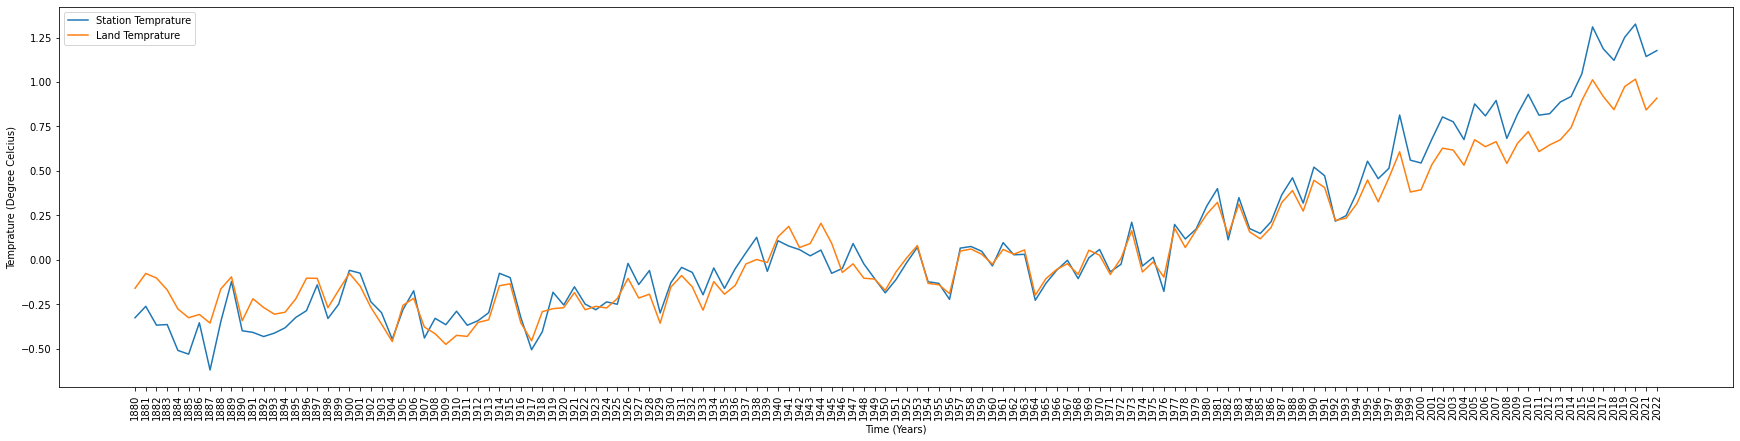

In [350]:
#Grouping the temprature data by year so as to obtain a meaningful plot for the temprature data 
temp_df1 = temp_df.groupby(by = ['Year']).mean().reset_index()

#Plotting the land and the station temprature
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.plot(temp_df1['Year'], temp_df1['Station'], label='Station Temprature')
plt.plot(temp_df1['Year'], temp_df1['land'], label='Land Temprature')
plt.xlabel('Time (Years)' )
plt.ylabel('Temprature (Degree Celcius)')
plt.legend()
#Adjusting the label size for visualizing them properly
plt.tick_params(axis='x', labelrotation=90, labelsize=10)

<h3> Observation </h3>

For temprature we can see that the temprature has risen since the last decade signifying the presence of global warming also we can see that there has been a proportional relationship between the land and the surface temprature that makes sense as both the tempratures should vary proportionally

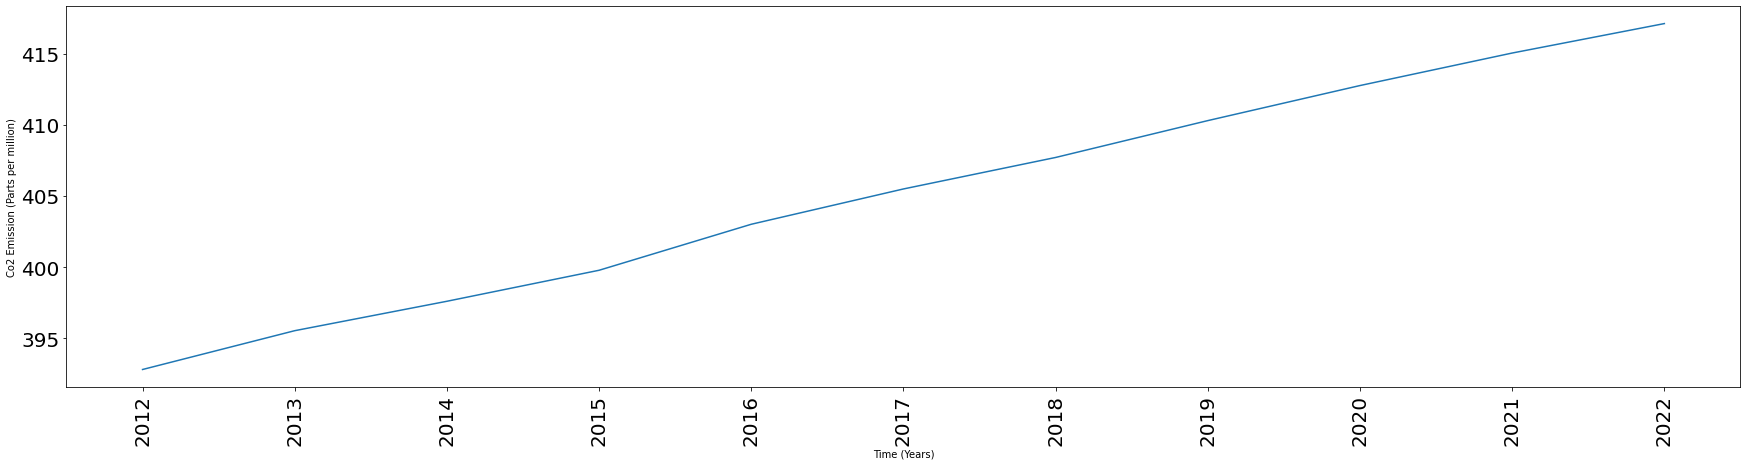

In [351]:
#Visualising the basic trend for the Carbon dioxide Emission 

#Grouping up the Co2 Emission data by year for making it simpler for visualizing 
co2_df1_plot =  co2_df1.groupby(by = ['Year' ]).mean().reset_index()

#Plotting the line plot for the Co2 emission trend 
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.plot(co2_df1_plot['Year'], co2_df1_plot['Trend'])
plt.xlabel('Time (Years)')
plt.ylabel('Co2 Emission (Parts per million)')
plt.tick_params(axis='x', labelrotation=90, labelsize=20)
plt.tick_params(axis='y', labelsize=20)

<h3> Observation </h3>

We can see that there has been constant rise in the co2 emission which has been the major contributing greenhouse gas for the global warming we can see that since 2012 the amount of co2 in the atmosphere has been rising constantly 

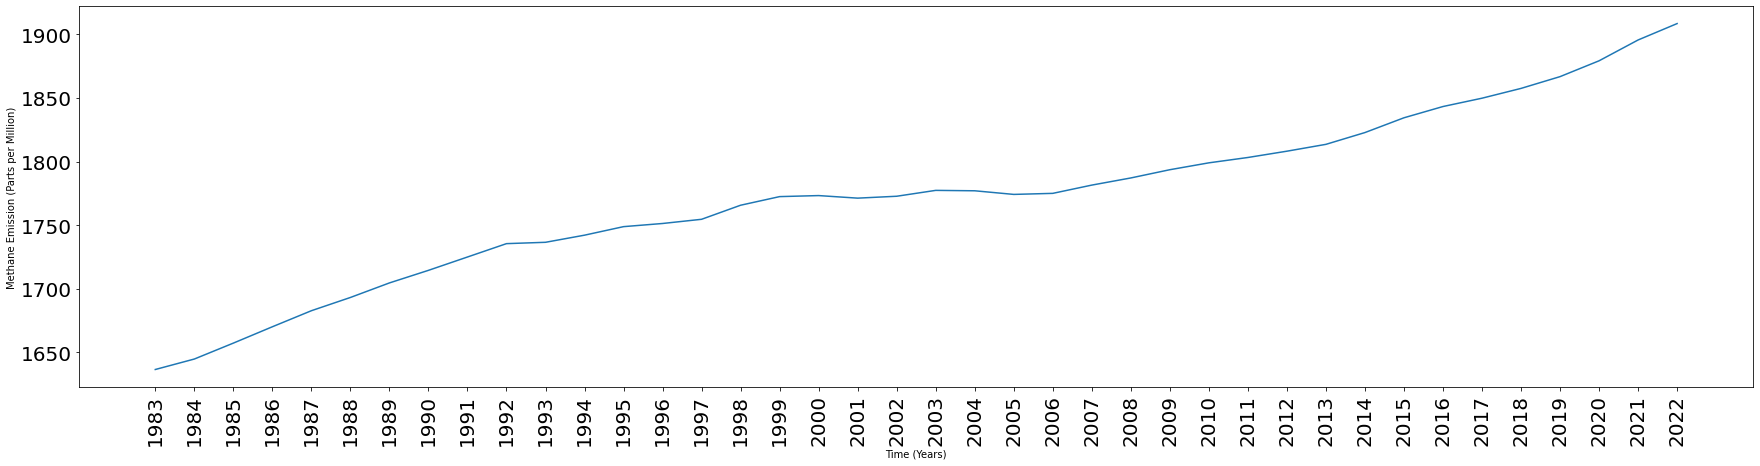

In [352]:
#Visualizing the basic trend for the Methane emission 

#Grouping the data for methane emission by year for making visualization easier to interpret
meth_plot = meth_df1.groupby(by = ['Year']).mean().reset_index()

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.plot(meth_plot['Year'], meth_plot['average'])
plt.xlabel('Time (Years)')
plt.ylabel('Methane Emission (Parts per Million)')
plt.tick_params(axis='x', labelrotation=90, labelsize=20)
plt.tick_params(axis='y', labelsize=20)

<h3> Observation </h3>

Same as the co2 emission, methane emission has also been on constant rise in the atmosphere and is also one of the most potent greenhouse gases responsible for the global warming from the above line graph we can see that the methane emission has also increased at a constant pace in the environment since 1983 to 2022

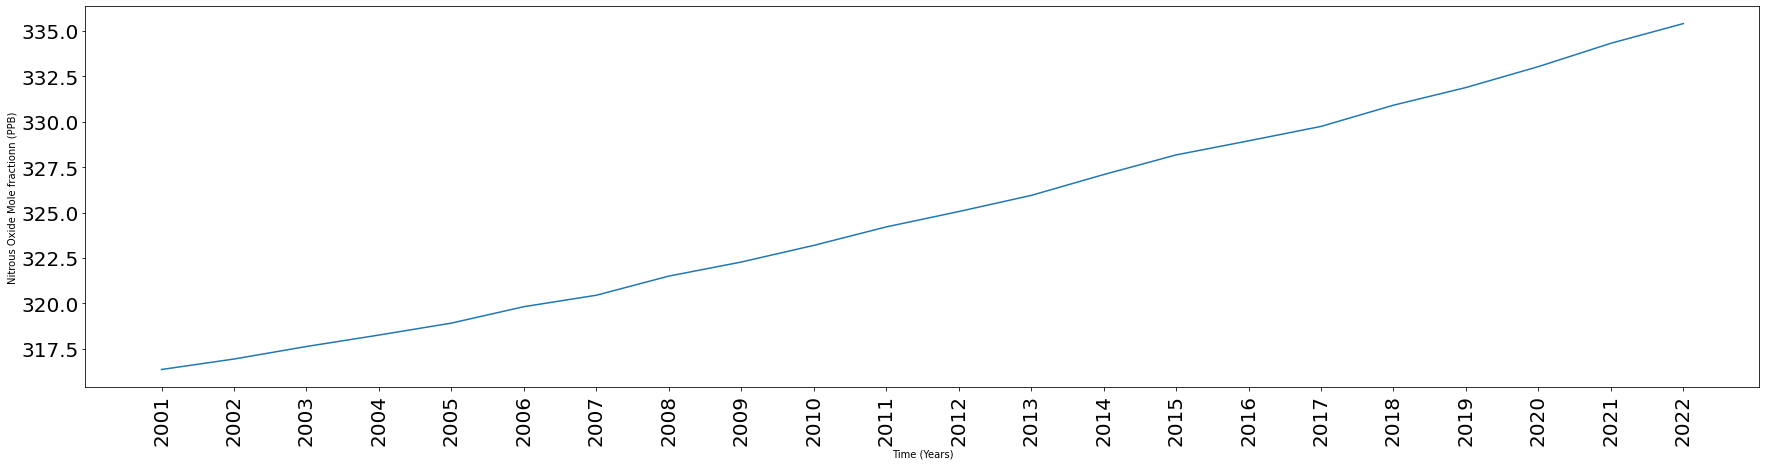

In [353]:
#Visualizing the data basic trend for the Nitrous Oxide Emission
nit_plot = nit_df1.groupby(by = ['Year']).mean().reset_index()
#Grouping the data for Nitrous Oxide emission by year for making visualization easier to interpret

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.plot(nit_plot['Year'], nit_plot['Average'])
plt.xlabel('Time (Years)')
plt.ylabel('Nitrous Oxide Mole fractionn (PPB)')
plt.tick_params(axis='x', labelrotation=90, labelsize=20)
plt.tick_params(axis='y', labelsize=20)

<h3> Observation </h3>

The Nitrous Oxide emission has also been on verge of contant increase since 2001 to 2022, It is also one of the gases majorly responsible for global warming 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


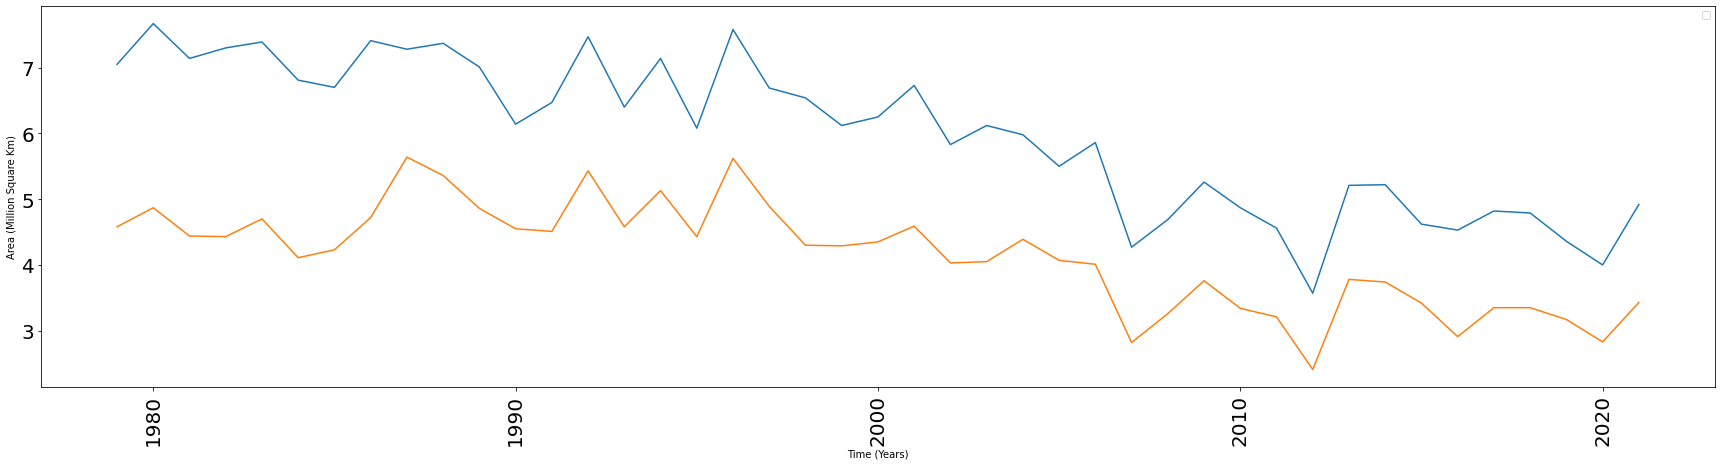

In [354]:
#Visualizing the basic trend for the Arctic polar caps area 
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)
plt.plot(polar_df1['Year'], polar_df1['Extent'])
plt.plot(polar_df1['Year'], polar_df1['Area'])
plt.xlabel('Time (Years)' )
plt.ylabel('Area (Million Square Km)')
plt.legend()

#Adjusting the label size for visualizing them properly
plt.tick_params(axis='x', labelrotation=90, labelsize=20)
plt.tick_params(axis='y', labelsize=20)

<h3>OBSERVATION </h3>

On analyzing the polar caps trend we can see that the average area and extent for the polar caps have decreased over the past few decades on account of global warming also we can see the proportionality between the Area and extent as the area denotes the actual coverage of the ice and extent denotes the total area that has atleast 15 percent ice cover.

### Plotting the Boxplots in order to analyze the distribution of each of the 5 entities 

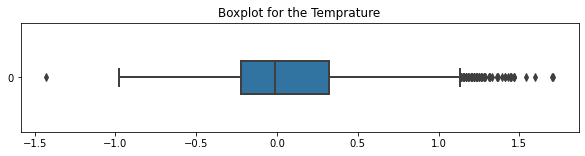

In [355]:
#Plotting the boxplots for the Temprature in order to see the overall variation
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(data = temp_df['Station'], width = 0.3 , linewidth = 2, ax=ax , orient = 'h').set(title='Boxplot for the Temprature')
plt.show()

<h3> Observation </h3>

We can see that the temprature for the given period of 1880-2022 had the median at near about 0°C and the overall station temperature for this period varied between -1.5°C to somewhere between 2°C

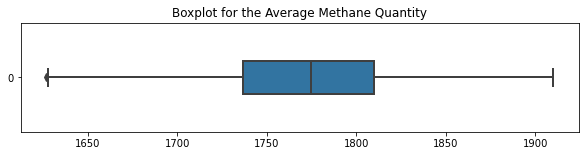

In [356]:
#Plotting the boxplots for the Average methane emission
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(data = meth_df1['average'], width = 0.3 , linewidth = 2, ax=ax , orient = 'h').set(title='Boxplot for the Average Methane Quantity')
plt.show()

<h3>Observation </h3>

The average methane quantity in the environment in PPM (parts per million range) in the atmosphere for the period being 1983-2022 ranged between somewhere around 1600 PPM to 1925 PPM with the median being somewhere around 1775 PPM

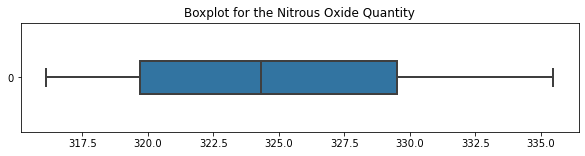

In [357]:
#Plotting the boxplots for the Average Nitrous Oxide emission
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(data = nit_df1['Average'], width = 0.3 , linewidth = 2, ax=ax , orient = 'h').set(title='Boxplot for the Nitrous Oxide Quantity')
plt.show()

<h3> Observation </h3> 

The average amount of Nitrous oxide in the atmosphere for the period 2001-2022 has ranged between 310PPB - 340 PPB (Parts per billion) with the median amount being somewhat around 323PPB

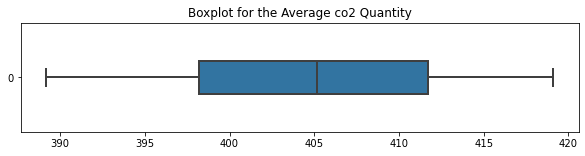

In [358]:
#Plotting the boxplots for the Average co2 Emission 
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(data = co2_df1['Cycle'], width = 0.3 , linewidth = 2, ax=ax , orient = 'h').set(title='Boxplot for the Average co2 Quantity')
plt.show()

<h3>Observation </h3>

The average amount of carbon dioxide for the period of 2012-2022 has ranged between around 385 PPM - 419 PPM (Parts Per Million) with the average quantity being somewhere around 406 PPM 

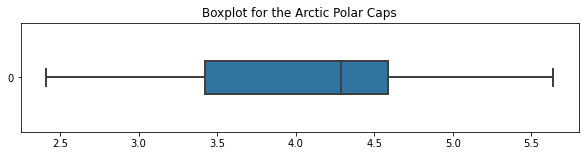

In [359]:
#Plotting the boxplots for the Arctic polar caps  
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(data = polar_df1['Area'], width = 0.3 , linewidth = 2, ax=ax , orient = 'h').set(title='Boxplot for the Arctic Polar Caps')
plt.show()

<h3> Observation </h3>

The average area of the Arctic polar caps has ranged between 2.4 Million sq Km. to 5.6 Million sq Km. with the median being around 4.3 million square km 

## Detailed information about all the entites on their count, mean , standard deviation and 5 number summary

In [360]:
#Mapping all required values for all the 5 entites  in a dataframe in order to represent them for detailed analysis
a = temp_df['Station'].describe().reset_index().rename(columns = {'Station': 'Temprature(°C)'})
b = meth_df1['average'].describe().reset_index().drop(columns = ['index']).rename(columns = {'average': 'Methane Quantity(PPM)'})
c = polar_df1['Area'].describe().reset_index().drop(columns = ['index']).rename(columns = {'Area': 'Polar Caps Area(Mil. Sq Km.)'})
d = nit_df1['Average'].describe().reset_index().drop(columns = ['index']).rename(columns = {'Average': 'Nitrous Oxide Quantity(PPB)'})
e = co2_df1['Cycle'].describe().reset_index().drop(columns = ['index']).rename(columns = {'Cycle': 'Co2 Quantity(PPM)'})
f= pd.concat([a,b,c,d,e], axis =1).set_index('index') #Setting up the index to be the descriptor column for better visualization
f

,Temprature(°C),Methane Quantity(PPM),Polar Caps Area(Mil. Sq Km.),Nitrous Oxide Quantity(PPB),Co2 Quantity(PPM)
index,,,,,
count,1713.000000,468.000000,43.000000,258.000000,3941.000000
mean,0.091745,1772.495662,4.138140,324.764729,405.064489
std,0.474945,62.991543,0.788073,5.672271,7.872625
min,-1.430000,1626.580000,2.410000,316.110000,389.160000
25%,-0.220000,1736.950000,3.425000,319.707500,398.190000
50%,-0.010000,1774.835000,4.290000,324.340000,405.150000
75%,0.320000,1809.982500,4.585000,329.505000,411.720000
max,1.710000,1909.980000,5.640000,335.480000,419.100000


<h3> Observation </h3>

In the above table we can see the detailed analysis for the various important elements for all the 5 entites, We were able to look at the partial information for all these in the boxplots plotted above however in this table we can fetch the detailed information about the entities

# Analyzing the inter-relationship between various parameters

### Analyzing the relationship between temeprature and Methane Emission

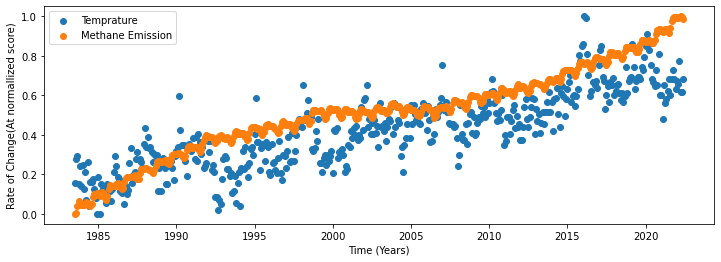

In [361]:
#Taking only those columns of the temprature which are greater then the year 1982 as for methane we have data starting from 1983 
methane_temp =  temp_df[temp_df['Year']>'1982'].iloc[6:-3].reset_index()
#Dropping out the not required columns from the dataframe 
methane_temp = methane_temp.drop(columns = [ 'index'], axis =1 )
methane_temp_final = pd.concat([methane_temp, meth_df1['average'] ], axis =1)
methane_temp_final['month'] = methane_temp_final['month'].astype(str)
methane_temp_final["Date"] = pd.to_datetime(methane_temp_final["Year"] + "/" + methane_temp_final["month"] )
methane_temp_final_1 = methane_temp_final.set_index('Date')

#Normalizing the feature values so that the different scales can be viewed on the same scale 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
methane_temp_trans = mms.fit_transform(methane_temp_final_1)
methane_temp_trans_1 = pd.DataFrame(methane_temp_trans, columns = [methane_temp_final_1])

#Concatinating the Date column back again in order to visualize the relationship with respect to date 
methane_temp_trans_2 = pd.concat([methane_temp_trans_1, methane_temp_final['Date']], axis =1)

#Plotting the scatter plot relatioship between the temprature and the Methane Emission 
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)
plt.scatter( methane_temp_trans_2['Date'] , methane_temp_trans_2[('land',)], label='Temprature')
plt.scatter(methane_temp_trans_2['Date'] , methane_temp_trans_2[('average',)] ,label='Methane Emission')
plt.xlabel('Time (Years)' )
plt.ylabel('Rate of Change(At normallized score)')
plt.legend()

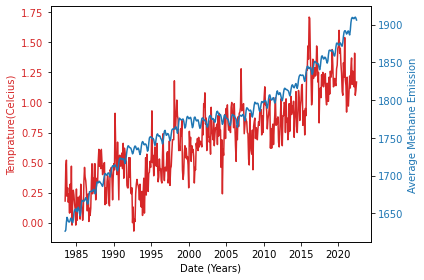

In [362]:
#plotting a line for the entire data in order to visualize the relationship more in detail 
fig, px = plt.subplots()

color = 'tab:red'
px.set_xlabel('Date (Years)')
px.set_ylabel("Temprature(Celcius)", color=color)
px.plot(methane_temp_final['Date'], methane_temp_final['Station'], color=color)
px.tick_params(axis='y', labelcolor=color)

bx = px.twinx()  # defining  a second axes that shares the same x-axis

color = 'tab:blue'
bx.set_ylabel('Average Methane Emission', color=color)  # we already handled the x-label with px
bx.plot(methane_temp_final['Date'], methane_temp_final['average'], color=color)
bx.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

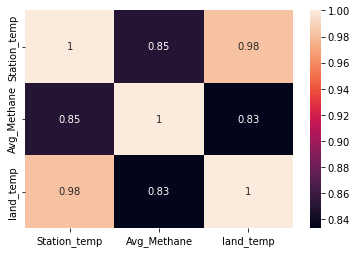

In [363]:
import seaborn as sea
#Changing the column name in order to clearly visualize the representation 
methane_temp_final_1.rename(columns = {'Station':'Station_temp','average': 'Avg_Methane', 'land': 'land_temp'}, inplace = True)
#Creating a correlation matrix between the 3 entites (Station Temprature, land Temprature and Average Methane Emission )
Correlation_Matrix = methane_temp_final_1[['Station_temp', 'Avg_Methane', 'land_temp']].corr()
sea.heatmap(Correlation_Matrix , annot= True)
plt.show()

<h3> Observation</h3>

From the above two graphs (scatter plot and the line graph) we can clearly see that the temprature has increased constantly with the rise in the emission of methane in the environment showing a proportional relationship between these 2 entities. Also in the correlation matrix we can see a very strong correlation between the Average Methane and the Land temprature which is around 0.85 and between Average Methane and Surface Temprature is 0.83, Also we can see a strong relationship between the surface and land temprature which is 0.98 which we have observed in earlier line plot also 

### Analyzing the relationship between the  Co2 Emission, Methane Emission and the temperature Change 

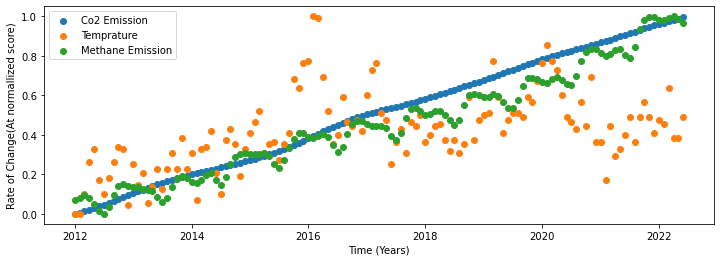

In [364]:
#Grouping the co2 data by Year and Month as methane data is available Month wise and co2 data is available date wise
co2_temprature= co2_df1.groupby(by= ['Year', 'Month']).mean().reset_index()
#Adding the additional date column by converting to pandas date format 
co2_temprature["date"] = pd.to_datetime(co2_temprature["Year"] + "/" + co2_temprature["Month"] )
co2_temprature.sort_values('date', inplace = True)
#Dropping out the not required columns
co2_temprature.drop(columns = ['Year', 'Month'], inplace = True)
a = methane_temp_final.iloc[342:, :].reset_index()
b = co2_temprature.iloc[:-4, :].reset_index()
a= a.drop(columns = ['index'], axis = 1)
b = b.drop(columns = ['index'], axis = 1)
#Concatinating the methane temperature and co2 data for visualization
co2_meth_temp = pd.concat([a, b ] , axis =1)
#Renaming the columns for better visualization
co2_meth_temp.rename({'Cycle': 'Co2 Cycle', 'Trend': 'Co2 Trend' , 'Station' : 'Station Temprature' , 'land' : 'land Temprature', 'average': 'Methane Average'}, axis=1, inplace=True)
co2_meth_temp = co2_meth_temp.drop(columns = ['date'])
co2_meth_plot = co2_meth_temp.set_index('Date')



#Normalizing the values as they are on different scales for plotting them out on the same scale 
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
co2_meth_temp_trans = mms.fit_transform(co2_meth_plot)
co2_meth_temp_trans_1 = pd.DataFrame(co2_meth_temp_trans, columns = [co2_meth_plot])

#Adding the date column back after normalization in order to visualize the effects of change with respect to date 
co2_meth_temp_trans_2 = pd.concat([co2_meth_temp_trans_1, co2_meth_temp['Date']], axis = 1)

#Plotting out the relationship between the co2 emission methane emission and the temprature change 
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)
plt.scatter( co2_meth_temp_trans_2['Date'] , co2_meth_temp_trans_2[('Co2 Trend',)] , label='Co2 Emission')
plt.scatter( co2_meth_temp_trans_2['Date']  , co2_meth_temp_trans_2[('land Temprature',)], label='Temprature' )
plt.scatter(co2_meth_temp_trans_2['Date'], co2_meth_temp_trans_2[('Methane Average',)], label='Methane Emission')
plt.xlabel('Time (Years)' )
plt.ylabel('Rate of Change(At normallized score)')
plt.legend()

<h3> Observation </h3>

On the scatter plot for the 3 entities, We can see that there has been a constant trend followed by the all three entities Co2 emisssion has been constant rise along with the methane emission, However from the graph we can see that the co2 emission is more rapid as the slope for that is more steep as compared to the methane emission. Also there has been constant rise in temprature seen along with these emissions

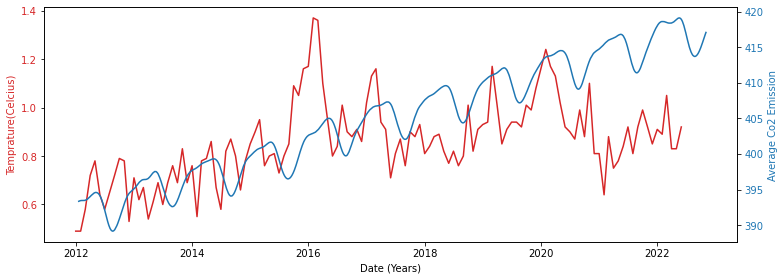

In [365]:
#3Plotting the correlation for the co2 emission and Temperature using the line graph 

fig, ax1 = plt.subplots(figsize = (11, 4))

color = 'tab:red'
ax1.set_xlabel('Date (Years)')
ax1.set_ylabel("Temprature(Celcius)", color=color)
ax1.plot(co2_meth_temp['Date'], co2_meth_temp['land Temprature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Co2 Emission', color=color)  # we already handled the x-label with ax1
ax2.plot(co2_df1['Date'], co2_df1['Cycle'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<h3> Observation </h3>

From the above line graph we can see that there is constant rise in the temperature with the increase in co2 quantity in the atmosphere signalling that co2 has been a potent cause of the warming effect on the planet, However as we had co2 data only from 2012 we had to clip the temperature data so that we can get the sensible comparison, leading to not good visualization of the temperature as it takes longer time periods of temperature to show better results 

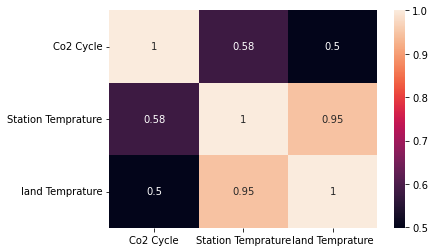

In [366]:
# Plotting out the correlation matrix between the co2 emissions and the temprature changes
Correlation_Matrix_1 = co2_meth_temp[['Co2 Cycle', 'Station Temprature', 'land Temprature' ]].corr()
sea.heatmap(Correlation_Matrix_1 , annot= True)
plt.show()

<h3> Observation </h3>

From the above heatmap and line graphs we can see that there has been positive correlation depicted in the heatmap between the Co2 Cycle and the Earth temprature cycle, We observe that there is correlation of 0.58 between Station temprature and Co2 Cycle. This correlation is lesser than that of the Methane emission and the earth's temprature signalling that methane has more impact over the earth's temperature.

### Plotting the correlation between the Nitrous oxide vs the temperature change 

In [367]:
#getting the required columns from the Nitrous oxide and temperature dataframe 
a = temp_df.iloc[1452:-3,:].rename(columns = {"Station":"Station_temprature", 'Year':'year'}).reset_index().drop(columns = ['index'])
b = nit_df1.rename(columns = {'Average': 'Average Nitrous Oxide'}).reset_index().drop(columns = ['index'])
#Concatinating the data from the two dataframes 
nit_temprature = pd.concat([a,b], axis =1 ).drop(columns = ['year', 'AverageUNC', 'TrendUNC', 'month', 'Trend'])
nit_temprature["date"] = pd.to_datetime(nit_temprature["Year"] + "/" + nit_temprature["Month"] )

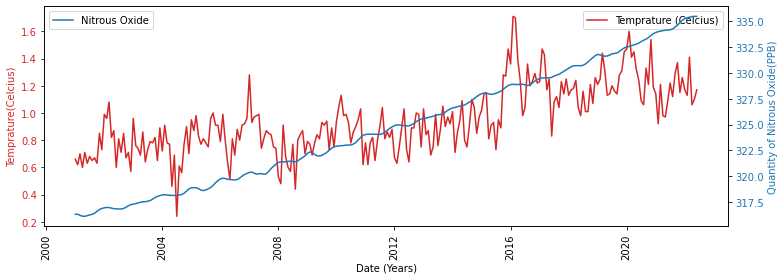

In [368]:
#Plotting the results for the Nitrous oxide dataframe 

fig, ax1 = plt.subplots(figsize = (11, 4))
color = 'tab:red'
ax1.set_xlabel('Date (Years)')
ax1.set_ylabel("Temprature(Celcius)", color=color)
ax1.plot(nit_temprature['date'], nit_temprature['Station_temprature'], color=color, label = 'Temprature (Celcius)')
plt.legend()
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x' , labelrotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Quantity of Nitrous Oxide(PPB)', color=color)  # we already handled the x-label with ax1
ax2.plot(nit_temprature['date'], nit_temprature['Average Nitrous Oxide'], color=color , label = 'Nitrous Oxide')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

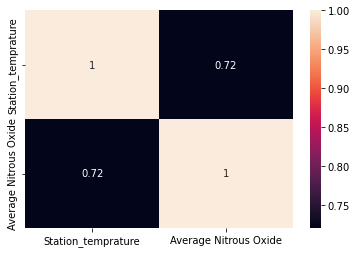

In [369]:
#Plotting out the correlation matrix for the temperature and nitrous oxide quantity 
Correlation_Matrix_0 = nit_temprature[['Station_temprature', "Average Nitrous Oxide" ]].corr()
sea.heatmap(Correlation_Matrix_0 , annot= True)
plt.show()

<h3> Observation </h3>

From the above 2 graphs the line graph and the correlation heatmap plotted between the Nitrous oxide and the temprature we can clearly see that there has been a strong correlation between the increasng temprature with the increase of quantity of Nitrous Oxide in the environment, From the heatmap we can see the strong correlation of 0.72 between the  temperature and the Nitrous Oxide Quantity in the environment 

### Plotting the correlation of Arctic polar caps data with temperature

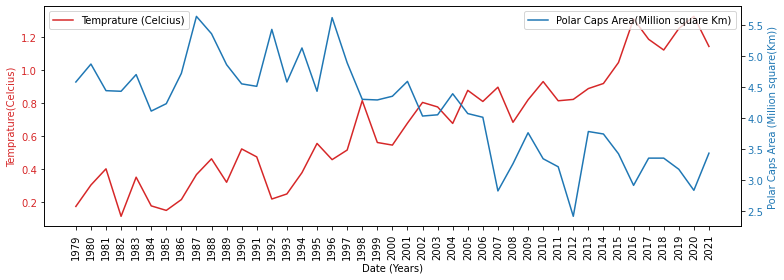

In [370]:
#Creating a dataframe that contains the intersection of date column for the Arctic data and  the polar caps data we have available 
a = temp_df1.iloc[99:-1 , :].drop(columns = ['month']).reset_index()
b = polar_df1.drop(columns= ['Month', 'Data_Type', 'Year']).reset_index()
#Renaming the columns for better visualization
a.rename(columns = {'Station' : 'Station_Temp', 'land': 'Land_Temp'}, inplace = True)
polar_temprature = pd.concat([a,b], axis =1 )

#Plotting out the line graph for the Arctic polar caps data and temperature data 
fig, ax1 = plt.subplots(figsize = (11, 4))
color = 'tab:red'
ax1.set_xlabel('Date (Years)')
ax1.set_ylabel("Temprature(Celcius)", color=color)
ax1.plot(polar_temprature['Year'], polar_temprature['Station_Temp'], color=color, label = 'Temprature (Celcius)')
plt.legend()
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x' , labelrotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Polar Caps Area (Million square(Km))', color=color)  # we already handled the x-label with ax1
ax2.plot(polar_temprature['Year'], polar_temprature['Area'], color=color , label = 'Polar Caps Area(Million square Km)')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<h3> Observation </h3>

On analyzing the trend between the Polar caps area and the rising temprature we can see that there is a strong negative  correlation between the polar caps area and the rising temparture, Where the Polar caps area has been constantly declining since the rise of tempratures on account of the global warming 

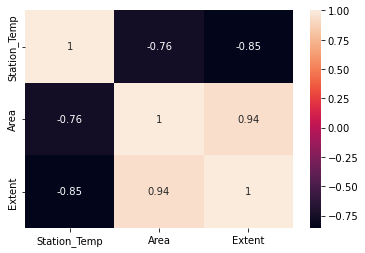

In [371]:
#Plotting the correlation matrix between the Station temperature and Polar Caps Area

Correlation_Matrix_2 = polar_temprature[['Station_Temp', 'Area' , 'Extent' ]].corr()
sea.heatmap(Correlation_Matrix_2 , annot= True)
plt.show()

<h3> Observation </h3>

We can see from the above correlation matrix that there is strong negative correlation of -0.85 between the temprature and the Extent of Arctic polar also there is a negative correlation of -0.76  between the Area and the temprature signifying that the rise in temprature has been strongly responsible for these melting of the polar caps 

### Plotting the correlation of Arctic Polar Caps with Methane Emission 

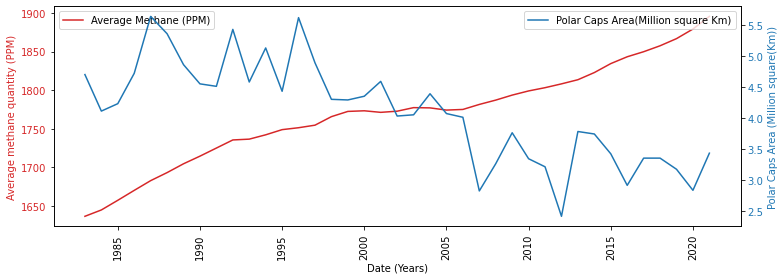

In [372]:
#Creating the dataframe that contains all the required columns for the Nitrous Oxide Quantity and the arctic polar caps area data 

me_1 = meth_plot.iloc[:-1,:].reset_index().drop(columns = ['Year'])
po_1 = polar_df1.iloc[4:,:].reset_index()
meth_polar = pd.concat([me_1, po_1], ignore_index = False , axis = 1)
meth_polar = meth_polar.drop(columns = ['index', 'Month' , 'Data_Type']) #Dropping out the not required columns 
meth_polar.rename(columns = {'average' : 'Avg_Methane', 'Area' : 'Polar'}, inplace = True) # Renaming the columns for better understanding


#Plotting the line graph for the Methane Quantity vs the  Polar caps area
fig, ax1 = plt.subplots(figsize = (11, 4))
color = 'tab:red'
ax1.set_xlabel('Date (Years)')
ax1.set_ylabel("Average methane quantity (PPM)", color=color)
ax1.plot(meth_polar['Year'], meth_polar['Avg_Methane'], color=color, label = 'Average Methane (PPM)')
plt.legend()
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x' , labelrotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Polar Caps Area (Million square(Km))', color=color)  # we already handled the x-label with ax1
ax2.plot(meth_polar['Year'], meth_polar['Polar'], color=color , label = 'Polar Caps Area(Million square Km)')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

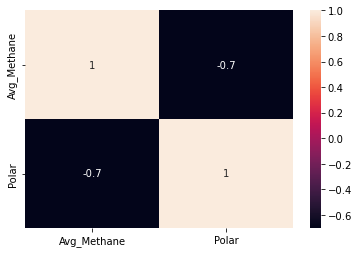

In [373]:
#Plotting the correlation matrix for methane quantity and polar caps area
Correlation_Matrix_3 = meth_polar[['Avg_Methane', 'Polar' ]].corr()
sea.heatmap(Correlation_Matrix_3 , annot= True)
plt.show()

<h3> Observation </h3>

From the above 2 depictions the line plot and the correlation matrix we can clearly see that their is strong negative correlation of -0.7 between the Average methane emission and the area of the polar caps, where the methane emission is rising with the increase of melting of polar caps.

As per a recent report Melting of the Arctic ice sheets drives the release of the potent greenhouse gas methane from the ocean floor and we can clearly see that correlation between the average methane concentration and the melting of the polar caps in the environment 

## Checking the correlation between the Nitrous Oxide Quantity and Arctic Polar Caps 

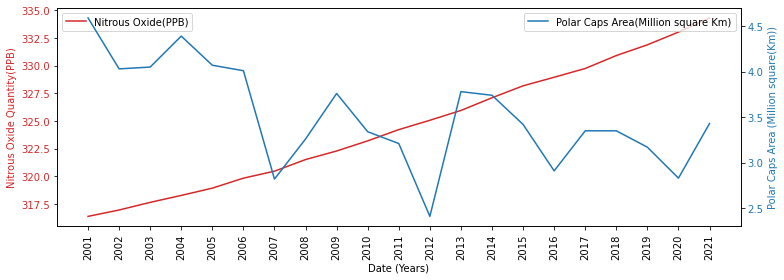

In [374]:
#Creating the dataframe that contains all the required columns for the Methane Emission and the arctic polar caps area data
a= nit_temprature.groupby(by=['Year']).mean().reset_index().iloc[:-1,:].drop(columns = ['land'])
b = polar_df1.iloc[22:, :].reset_index().drop(columns = ['Data_Type', 'Month']).rename(columns = {'Extent': 'Polar_Extent', 'Area':'Polar Area', 'Year': 'year'})
nit_temp_polar = pd.concat([a,b],axis =1 ).drop(columns = ['index', 'year'])

#Plotting the graph for the Nitrous oxide emission vs the arctic polar caps area
fig, ax1 = plt.subplots(figsize = (11, 4))
color = 'tab:red'
ax1.set_xlabel('Date (Years)')
ax1.set_ylabel("Nitrous Oxide Quantity(PPB)", color=color)
ax1.plot(nit_temp_polar['Year'], nit_temp_polar['Average Nitrous Oxide'], color=color, label = 'Nitrous Oxide(PPB)')
plt.legend()
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x' , labelrotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Polar Caps Area (Million square(Km))', color=color)  # we already handled the x-label with ax1
ax2.plot(nit_temp_polar['Year'], nit_temp_polar['Polar Area'], color=color , label = 'Polar Caps Area(Million square Km)')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

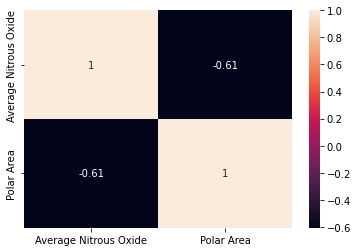

In [375]:
#Plotting the correlation matrix for visualizing Nitrous Oxide and Polar Area relation
Correlation_Matrix_3 = nit_temp_polar[['Average Nitrous Oxide', 'Polar Area' ]].corr()
sea.heatmap(Correlation_Matrix_3 , annot= True)
plt.show()

<h3> Observation  </h3>

From the above 2 plots the line graph and the correlation matrix we can see that there is strong negative correlation between the Nitrous Oxide and Polar Caps area, signifying that with the increase in quantity of Nitrous Oxide in the environment the polar caps have been declining in area, this is as the Nitrous oxide causes the temprature to increase by trapping radiation and temprature inturn causes the melting of the polar caps due to warming effect

## Analyzing the relationship between co2 quantity, Temperature, Methane Quantity, Nitrous Oxide quantity and Arctic Polar Caps 

Preprocessing the data set in order to visualize all the columns in the same table, we need to do this as we have all the 
data available for different time frames, for instance co2 data is only available from 2012- 2021 whereas temperature data is 
available since 1880 hence we need to combine all the data for common time period.

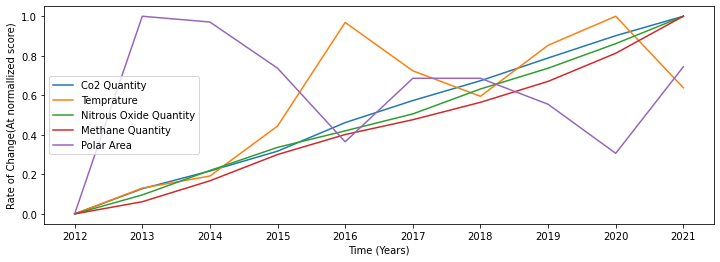

In [376]:
#Fetching all the required columns for the intersecting time period of 2012 -2021

a = co2_df1_plot.rename(columns = {'Cycle':'co2_quantity'}).reset_index().drop(columns = ['Trend', 'Year' , 'index']).iloc[:-1,:]
nit_temp_polar_co2_meth = pd.concat([a,nit_temp_polar.iloc[11:,:].reset_index(), meth_plot.iloc[29:-1,:]['average'].reset_index()], axis =1 ).drop(columns = ['index']).rename(columns = {'average': 'Methane_Quantity'})
nit_temp_polar_co2_meth1 = nit_temp_polar_co2_meth.set_index('Year')


#As all the data is available for different scales for instance Co2 quantity is in PPM and Nitrous oxide is in PPB and temprature
#data is available in Degrees hence we need to normalize the data in order to visualize it on the same scale.

MMS_3 = MinMaxScaler()
nit_temp_polar_co2_meth_tr = MMS_3.fit_transform(nit_temp_polar_co2_meth1)
nit_temp_polar_co2_meth_tr1 = pd.DataFrame(nit_temp_polar_co2_meth_tr, columns = [nit_temp_polar_co2_meth1])
all_final = pd.concat([nit_temp_polar_co2_meth_tr1, nit_temp_polar_co2_meth['Year']], axis = 1 )

#Plotting the line plot for all the 5 Quantities in order to visualize the relationship between each of them together

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)
plt.plot( all_final['Year'] , all_final[('co2_quantity',)] , label='Co2 Quantity')
plt.plot( all_final['Year'] , all_final[('Station_temprature',)] , label='Temprature')
plt.plot( all_final['Year'] , all_final[('Average Nitrous Oxide',)] , label='Nitrous Oxide Quantity')
plt.plot( all_final['Year'] , all_final[('Methane_Quantity',)] , label='Methane Quantity')
plt.plot( all_final['Year'] , all_final[('Polar Area',)] , label='Polar Area')
plt.xlabel('Time (Years)' )
plt.ylabel('Rate of Change(At normallized score)')
plt.legend()
plt.show()

<h3> Observation </h3>

From the above line plot for all the 5 entities for the period of 2012 - 2021 we can clearly see that the quantity of Methane, Nitrous Oxide and Co2 has increased in the environment at a great pace.

Also we can see that the temperature has increased over this period. and the polar caps area has declined for the period, However as we have only  taken the period of 2012 -2021 we are able to see the limited visualization for temperature and polar caps as these entities require large time periods for showing small changes , and as we have some of the data only available from 2012 hence we had to compromise with some of the data in order to combine all the data togethere for visualization

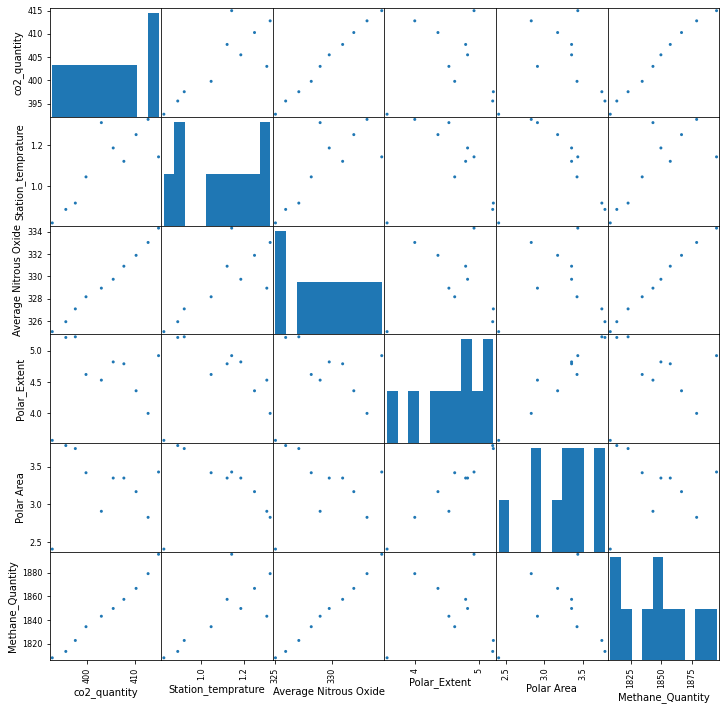

In [377]:
#Plotting the scatter matrix for all the 5 entities 
from pandas.plotting import scatter_matrix
ax = scatter_matrix(nit_temp_polar_co2_meth1, figsize=(12,12), alpha=1)

<h3> Observation </h3>

The above scatter matrix provides us with the correlation how two entites variables with one another in terms of magnitude as well as the direction here in the above matrix we can see that for the variable that are positively correlated we can see a positive slope in the scatter plots point for instance in co2 Quantity and the temprature we can visualize the positive slope but here we cannot see the visualization much clearly hence in the next step we will see the heatmap

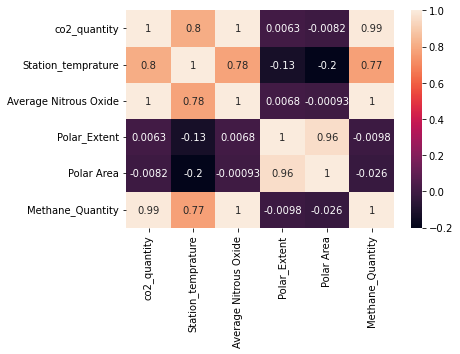

In [378]:
#Plotting the correlation matrix for all the variable (co2_quantity, temperature, Nitrous Oxide Quantity, Methane Quantity, Polar Area)
Correlation_Matrix_5 = nit_temp_polar_co2_meth1.corr()
sea.heatmap(Correlation_Matrix_5 , annot= True)
plt.show()

<h3> Observation </h3>

From the correlation matrix we can clearly see that there has been strong positive correlation between the below entites signifying that the increase in the magnitude of one quantity leads to positively affect the other one 
* Methane quantity and temperature (0.77)
* Nitrous Oxide quantity and temperature (0.78)
* co2 quantity and temperature (0.8)

Also we can notice a negative  correlation between the below entites signifying that the increase in one of them pushes the the other one to decline in magnitude hence they are negatively correlated
* Co2 Quantity and Polar Area
* Methane Quantity and Polar Area
* Nitrous Oxide Quantity and Polar Area
* Temperature and Polar Area

<h2 > CONCLUSION </h2>


In the data we are able to see the general trend for temperature, arctic polar and various greenhouse gases present in the environment, we are able to see the interrelationship between the temperature trend and the its relatioship to these gases, We are able to find the root cause of the melting polar caps below are the insights we are able to draw from the data.

* The Quantity of harmful greenhouse gases, Methane , Nitrous Oxide and Carbon dioxide has been constantly surging at an alarming rate


* We are able to analyze that what is the average, maximum, minimum and standard deviation for the various entities for the period for which the data has been collected, for instance- we can see the range in which temperature has varied for the period of 1880-2022 and the range of quantity for methane, Co2 and Nitrous Oxide. Also we observed how much the area for the polar caps have varied for the given time period 


* We are able to see a postive correlation between these harmful gases and the constantly rising earth's temperature. Showcasing that these harmful gases are responsible for the increase in the temperature of the Earth which is causing the effect of global warming on the planet. This trend has already been verified by various scientific studies and can also been seen in the data.


    * Increase in quantity of Co2 is causing increase in Earth's Temperature.
    * Increase in quantity of Methane is causing Increase in Earth's Temperature.
    * Increase in quantity of Nitrous Oxide is also causing increase in Earth's temperature.
    
* Other thing we are able to verify is that the increase in the Earth's Temperature has been the cause of the melting Polar Caps.As we can see a strong negative correlation between the earth's temperature and the melting polar caps.


* As per certain studies it is seen that the melting polar caps further releases methane into the atmosphere which leads to further warming effect, we are able to verify this trend of rise in methane with the melting of the Polar Caps
    

<h2> CHALLENGES FACED </h2>


Some of the major challenges faced during this assignment were related to the pre-processing of the data like.

* All the data were in entirely different scales like co2 quantity was in PPM, Nitrous oxide quantity was in PPB and temperature was in degree celcius, which made it difficult while inter comparing them. As I had to normalize the scale each time before plotting for the correlation between them.


* Another major challege faced was that all the data was for different time periods for instance the Temperature data was available for the period of 1880-2022, On the other hand co2 data was only available for the time period of 2012-2022 and all other data's were also available for different time periods hence I always had to create seperate dataframes in order to find the intersection of those time-periods so that I can make sensible correlations.


* Another challege was that the data available for the time-periods was also on different levels like the data for co2 was available for each day of the year, however the data for the polar caps was only available for the yearly basis with one value for each year, on the contrary the data for Nitrous oxide and Methane was available on Monthly basis so I had to pre-process data each time before correlating them. 

<h2>FURTHER ANALYSIS ON DATA </h2>

The further analysis that we can do on this data can be that we can use the historical timeseries data for all the variables and then use it for the prediction of further trend of those variable in future for instance we can predict what could be the potential quantity of co2 in future or how much methane would be there in the environment at the same pace in a few years